In [2]:
# Ensure the project root is in PATH.
import sys

sys.path.append("../")
# All imports of our code are relative to the project root.

from backtester.backtester import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sys
import os


# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output

In [3]:
market_data_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_0.csv"), sep=";")
market_data_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_1.csv"), sep=";")
market_data_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_2.csv"), sep=";")

trades_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_0.csv"), sep=";")
trades_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_1.csv"), sep=";")
trades_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_2.csv"), sep=";")


market_data_round_3_all3days = concatenate_historical_data([market_data_round_3_day_0, market_data_round_3_day_1, market_data_round_3_day_2])
trades_round_3_all3days = concatenate_historical_data([trades_round_3_day_0, trades_round_3_day_1, market_data_round_3_day_2])

In [4]:
market_data = market_data_round_3_day_0.copy()
trade_history = trades_round_3_day_0.copy()


np.unique(market_data['product'])

array(['CROISSANTS', 'DJEMBES', 'JAMS', 'KELP', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'SQUID_INK', 'VOLCANIC_ROCK',
       'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250',
       'VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750'], dtype=object)

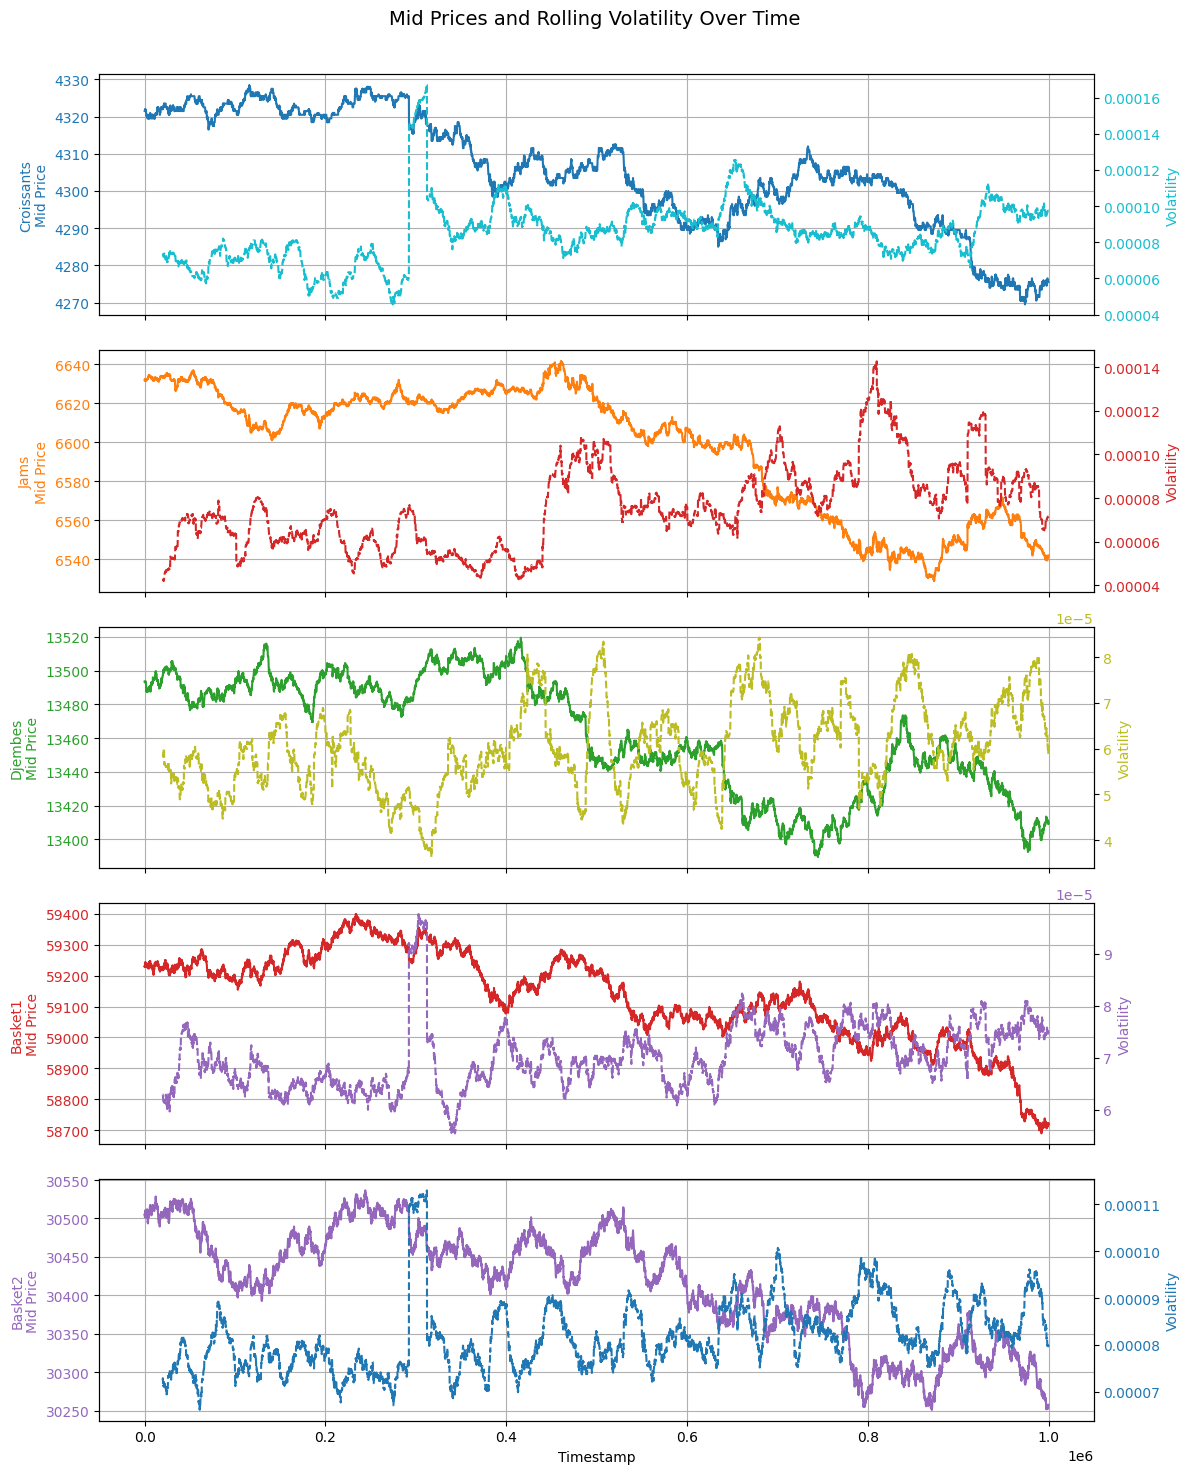

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the volatility window length; change this value as needed.
vol_window = 200

# Extract data for each symbol and reset the index
croissants = market_data[market_data["product"] == "CROISSANTS"].reset_index(drop=True)
jams = market_data[market_data["product"] == "JAMS"].reset_index(drop=True)
djembes = market_data[market_data["product"] == "DJEMBES"].reset_index(drop=True)
basket1 = market_data[market_data["product"] == "PICNIC_BASKET1"].reset_index(drop=True)
basket2 = market_data[market_data["product"] == "PICNIC_BASKET2"].reset_index(drop=True)

# Define a helper function to compute volatility
def compute_volatility(df, window):
    # Compute percentage change (could also use log returns if preferred)
    df["return"] = df["mid_price"].pct_change()
    # Compute rolling volatility (standard deviation) of returns
    df["volatility"] = df["return"].rolling(window=window).std()
    return df

# Compute volatility for each dataset
croissants = compute_volatility(croissants, vol_window)
jams = compute_volatility(jams, vol_window)
djembes = compute_volatility(djembes, vol_window)
basket1 = compute_volatility(basket1, vol_window)
basket2 = compute_volatility(basket2, vol_window)

# Create subplots: one row per instrument
fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

# --- Plot for CROISSANTS ---
axes[0].plot(croissants["timestamp"], croissants["mid_price"], color="tab:blue", label="Mid Price")
axes[0].set_ylabel("Croissants\nMid Price", color="tab:blue")
axes[0].tick_params(axis='y', labelcolor="tab:blue")
axes[0].grid(True)
ax0_twin = axes[0].twinx()
ax0_twin.plot(croissants["timestamp"], croissants["volatility"], color="tab:cyan", linestyle="--", label="Volatility")
ax0_twin.set_ylabel("Volatility", color="tab:cyan")
ax0_twin.tick_params(axis='y', labelcolor="tab:cyan")

# --- Plot for JAMS ---
axes[1].plot(jams["timestamp"], jams["mid_price"], color="tab:orange", label="Mid Price")
axes[1].set_ylabel("Jams\nMid Price", color="tab:orange")
axes[1].tick_params(axis='y', labelcolor="tab:orange")
axes[1].grid(True)
ax1_twin = axes[1].twinx()
ax1_twin.plot(jams["timestamp"], jams["volatility"], color="tab:red", linestyle="--", label="Volatility")
ax1_twin.set_ylabel("Volatility", color="tab:red")
ax1_twin.tick_params(axis='y', labelcolor="tab:red")

# --- Plot for DJEMBES ---
axes[2].plot(djembes["timestamp"], djembes["mid_price"], color="tab:green", label="Mid Price")
axes[2].set_ylabel("Djembes\nMid Price", color="tab:green")
axes[2].tick_params(axis='y', labelcolor="tab:green")
axes[2].grid(True)
ax2_twin = axes[2].twinx()
ax2_twin.plot(djembes["timestamp"], djembes["volatility"], color="tab:olive", linestyle="--", label="Volatility")
ax2_twin.set_ylabel("Volatility", color="tab:olive")
ax2_twin.tick_params(axis='y', labelcolor="tab:olive")

# --- Plot for PICNIC_BASKET1 ---
axes[3].plot(basket1["timestamp"], basket1["mid_price"], color="tab:red", label="Mid Price")
axes[3].set_ylabel("Basket1\nMid Price", color="tab:red")
axes[3].tick_params(axis='y', labelcolor="tab:red")
axes[3].grid(True)
ax3_twin = axes[3].twinx()
ax3_twin.plot(basket1["timestamp"], basket1["volatility"], color="tab:purple", linestyle="--", label="Volatility")
ax3_twin.set_ylabel("Volatility", color="tab:purple")
ax3_twin.tick_params(axis='y', labelcolor="tab:purple")

# --- Plot for PICNIC_BASKET2 ---
axes[4].plot(basket2["timestamp"], basket2["mid_price"], color="tab:purple", label="Mid Price")
axes[4].set_ylabel("Basket2\nMid Price", color="tab:purple")
axes[4].tick_params(axis='y', labelcolor="tab:purple")
axes[4].grid(True)
ax4_twin = axes[4].twinx()
ax4_twin.plot(basket2["timestamp"], basket2["volatility"], color="tab:blue", linestyle="--", label="Volatility")
ax4_twin.set_ylabel("Volatility", color="tab:blue")
ax4_twin.tick_params(axis='y', labelcolor="tab:blue")
axes[4].set_xlabel("Timestamp")

fig.suptitle("Mid Prices and Rolling Volatility Over Time", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


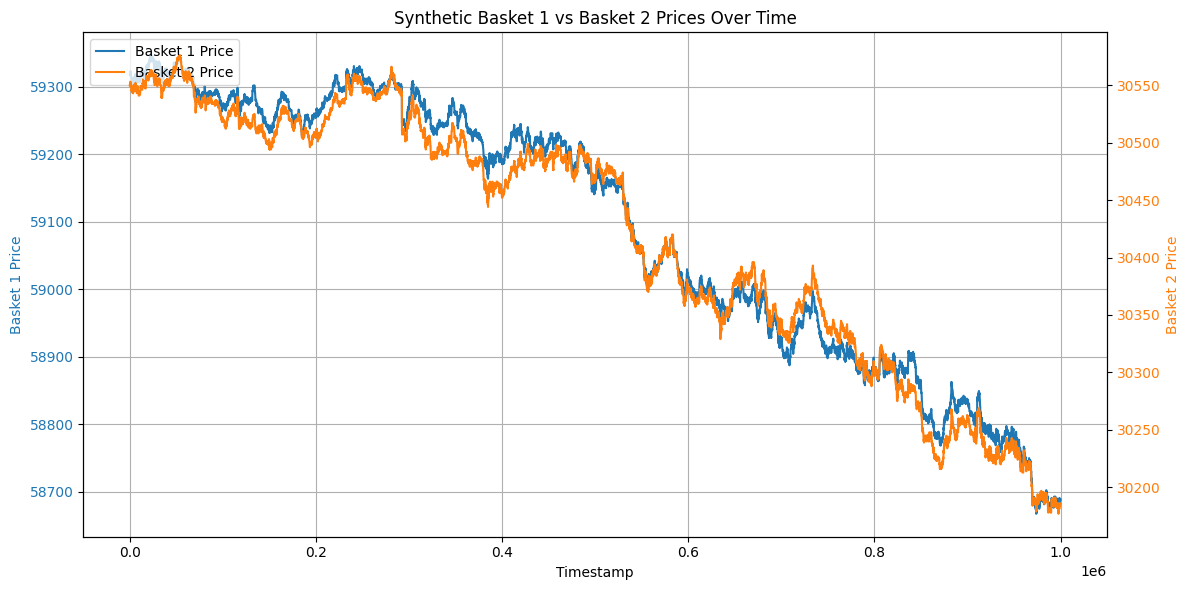

In [6]:
synthetic_basket1_price = 6 * croissants["mid_price"] + 3 * jams["mid_price"] + djembes["mid_price"]
synthetic_basket2_price = 4 * croissants["mid_price"] + 2 * jams["mid_price"]


# use twinx to plot two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()


# Plot basket 1 on primary y-axis
ax1.plot(croissants["timestamp"], synthetic_basket1_price, color="tab:blue", label="Basket 1 Price")
ax1.set_ylabel("Basket 1 Price", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

# Plot basket 2 on secondary y-axis
ax2.plot(croissants["timestamp"], synthetic_basket2_price, color="tab:orange", label="Basket 2 Price")
ax2.set_ylabel("Basket 2 Price", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

# X-axis label and title
ax1.set_xlabel("Timestamp")
plt.title("Synthetic Basket 1 vs Basket 2 Prices Over Time")

# Optional: Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()



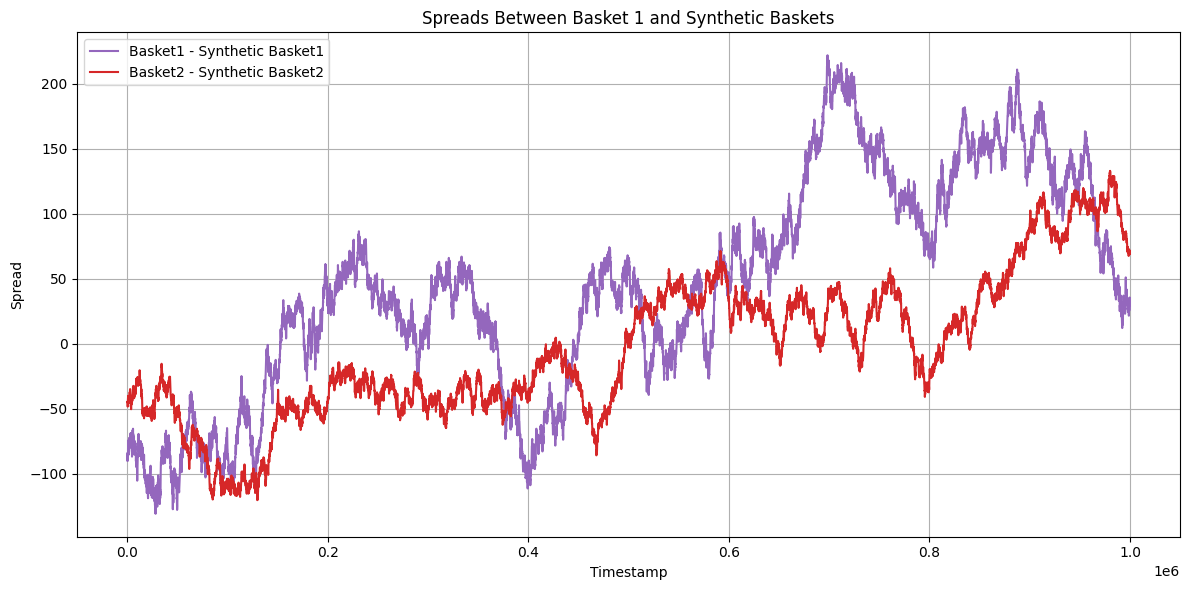

In [7]:
# Calculate spreads
spread_b1 = basket1['mid_price'] - synthetic_basket1_price
spread_b2 = basket2['mid_price'] - synthetic_basket2_price

# Plot
plt.figure(figsize=(12, 6))
plt.plot(basket1["timestamp"], spread_b1, color="tab:purple", label="Basket1 - Synthetic Basket1")
plt.plot(basket1["timestamp"], spread_b2, color="tab:red", label="Basket2 - Synthetic Basket2")

plt.title("Spreads Between Basket 1 and Synthetic Baskets")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


When this is positive, basket1 is worth more than synthetic.  

When this is negative, basket2 is worth less than the synthetic.  

Lets do pairs trading here.  

The spread should be mean reverting.  

Perhaps an indicator for whether the spread will move in one direction is if a particular constituent asset moves in one direction? For example if Djembe crashes a bit then basket 1 will follow in like 1000 timestamps? 

Track the z-score of the spread of basket2 over time.

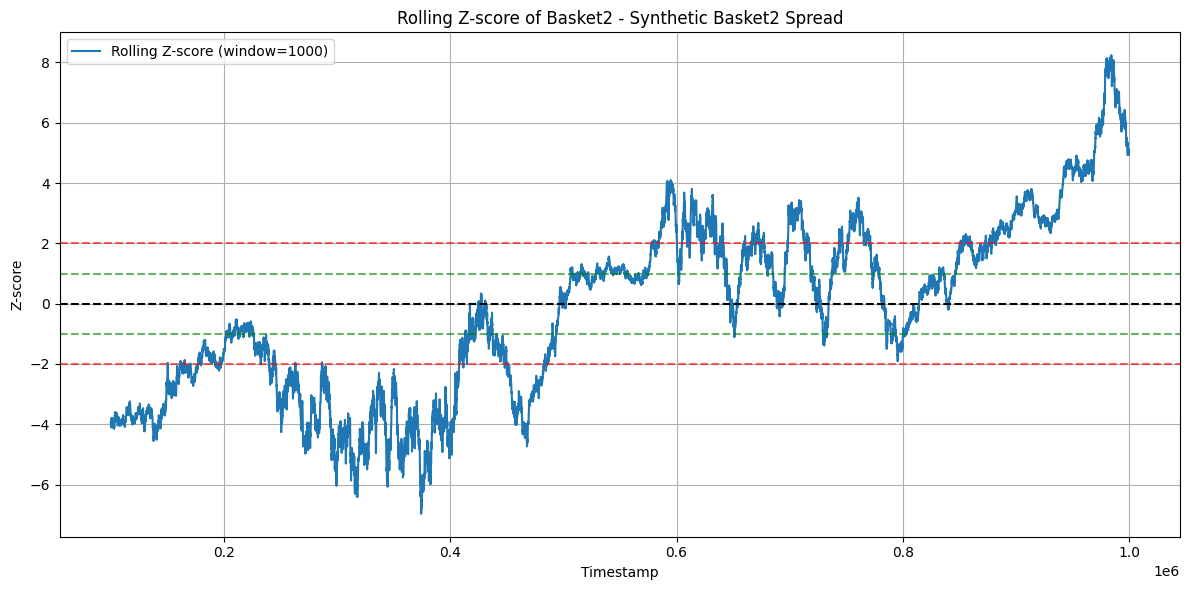

In [8]:
window = 1000  # You can tune this window size

# Compute spread
spread_b2 = basket2["mid_price"] - synthetic_basket2_price

# Rolling mean and std (causal, doesn't look ahead)
rolling_mean = 0  # theo spread should be 0   #spread_b2.rolling(window=window, min_periods=window).mean()
rolling_std = spread_b2.rolling(window=window, min_periods=window).std()

# Z-score calculation
z_score = (spread_b2 - rolling_mean) / rolling_std

# Plot
plt.figure(figsize=(12, 6))
plt.plot(basket2["timestamp"], z_score, label=f"Rolling Z-score (window={window})", color="tab:blue")
plt.axhline(0, color="black", linestyle="--")
plt.axhline(1, color="green", linestyle="--", alpha=0.6)
plt.axhline(-1, color="green", linestyle="--", alpha=0.6)
plt.axhline(2, color="red", linestyle="--", alpha=0.6)
plt.axhline(-2, color="red", linestyle="--", alpha=0.6)

plt.title("Rolling Z-score of Basket2 - Synthetic Basket2 Spread")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Lets look at some correlations  
I hypothesise that we will be able to predict the future spread based on some features / interactions between   
- volatility of constituents
- volatility of etf 
- lag returns of constituents


C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **

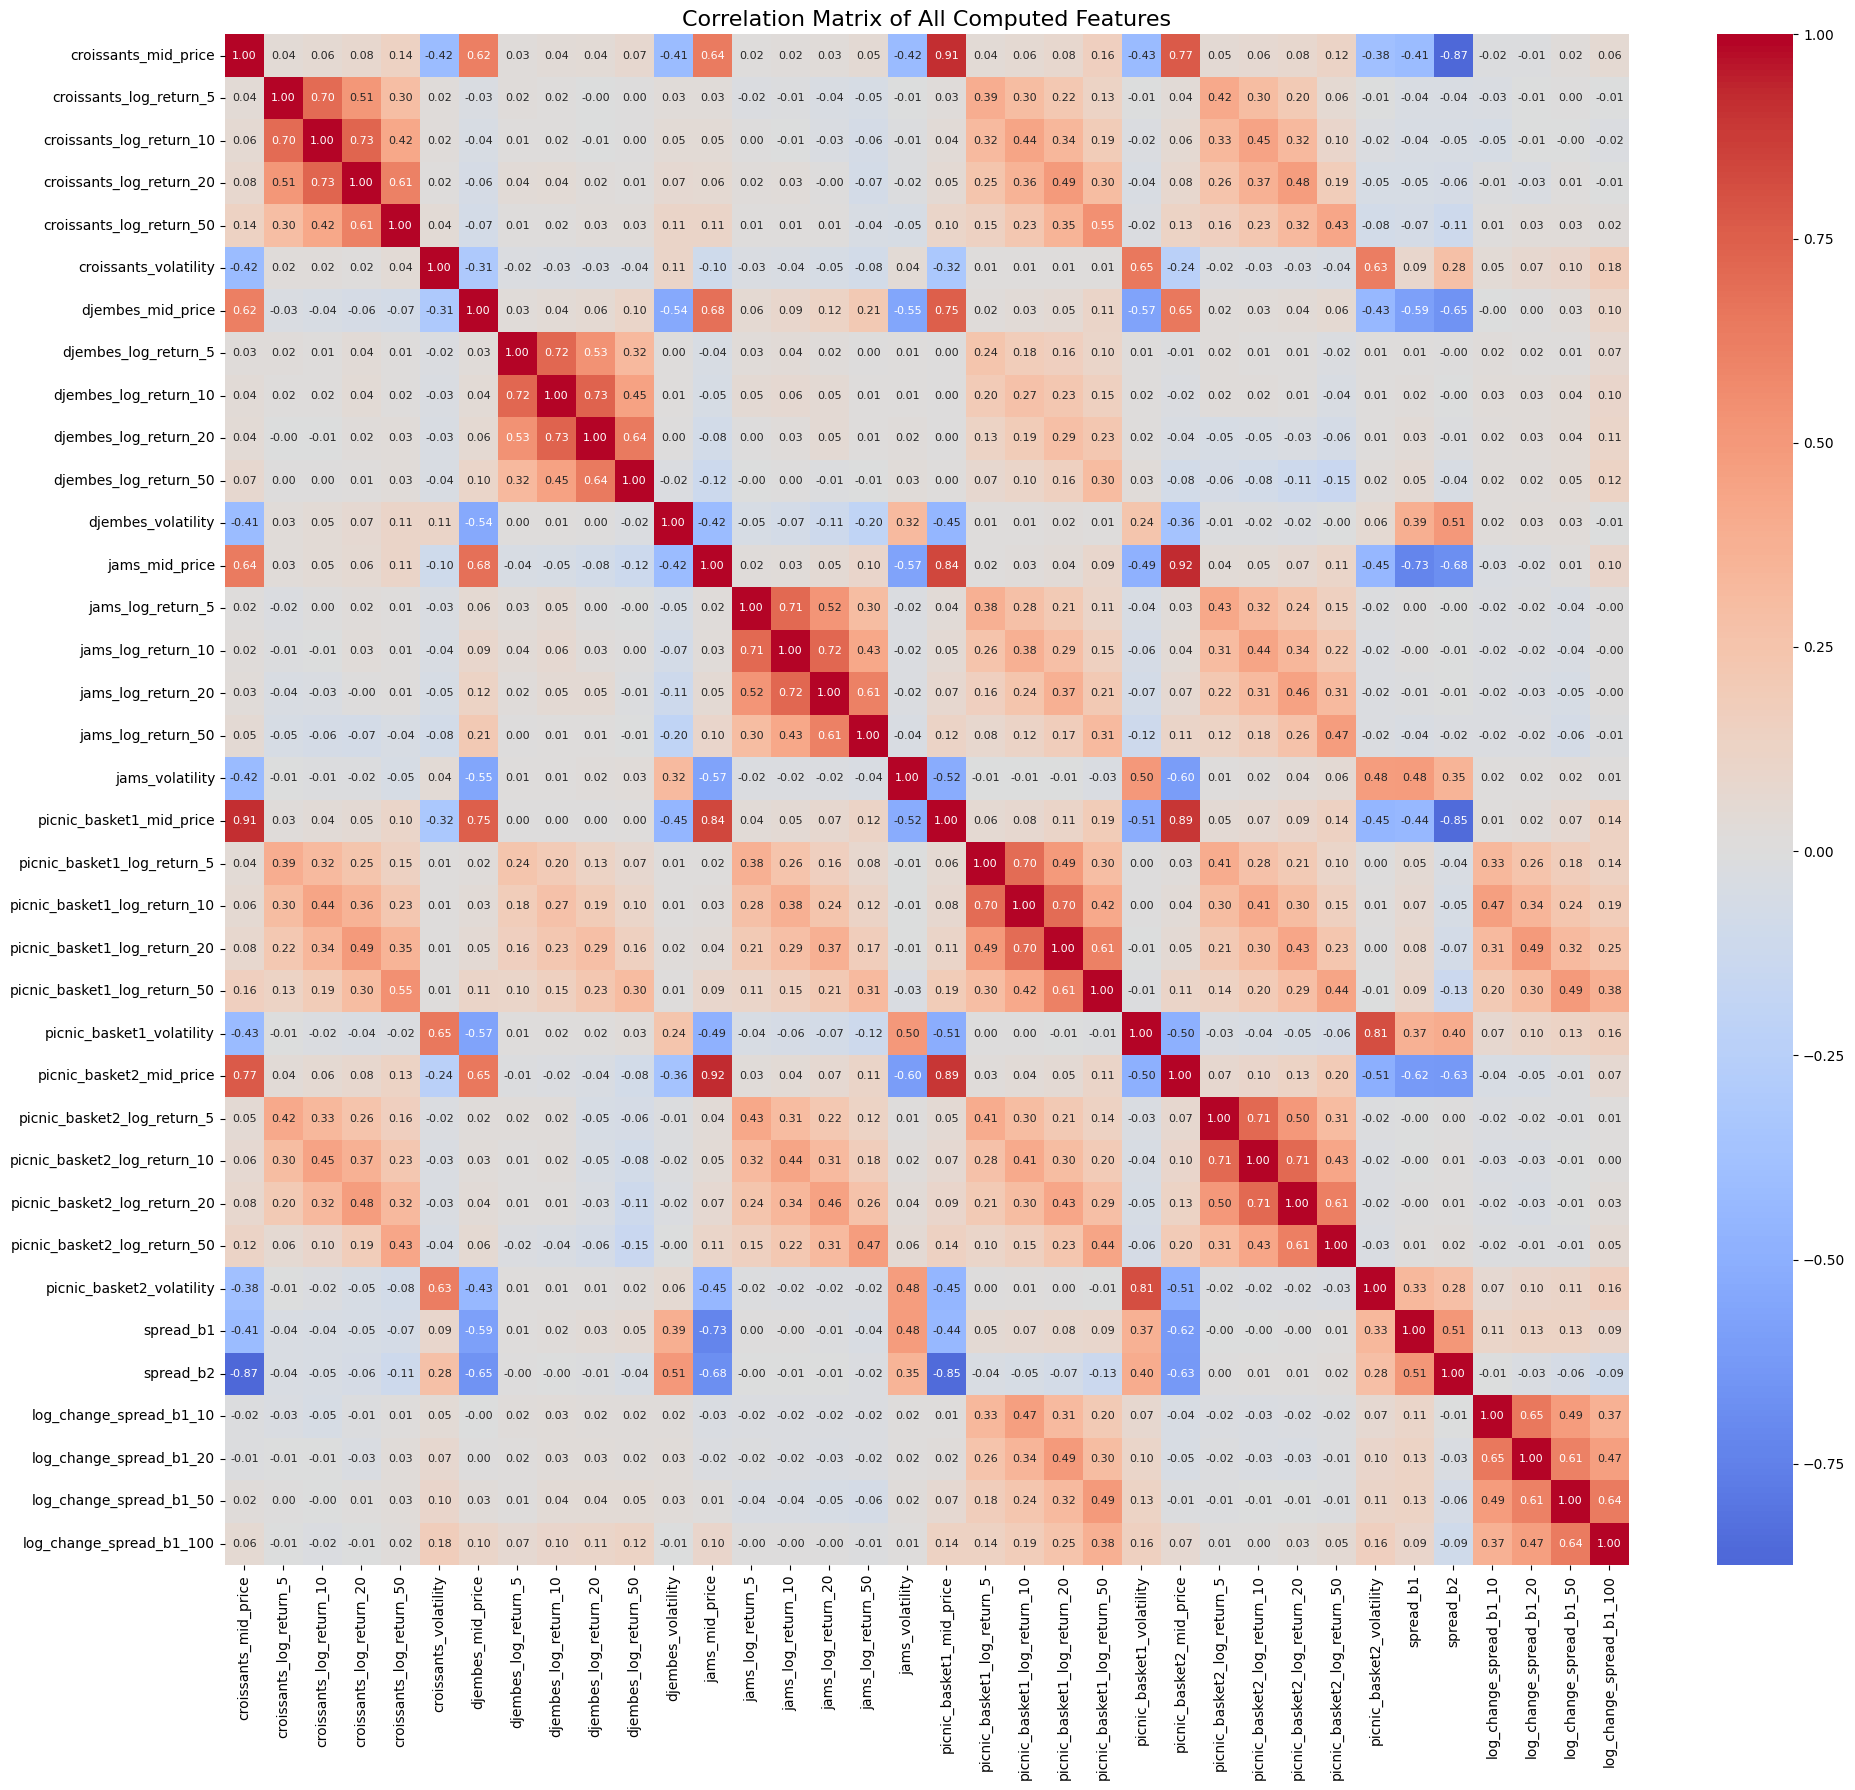

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# User-defined parameters
vol_window = 200
lags = [5, 10, 20, 50]
symbols = ["CROISSANTS", "DJEMBES", "JAMS", "PICNIC_BASKET1", "PICNIC_BASKET2"]

# Load and filter the market data
df = market_data.copy()
df = df[df["product"].isin(symbols)]
# Drop all columns except 'timestamp', 'product', and 'mid_price'
df = df[["timestamp", "product", "mid_price"]]

# Create a list to hold per-symbol feature DataFrames
result_dfs = []

for sym in symbols:
    # Filter for each symbol and sort by timestamp
    df_sym = df[df["product"] == sym].copy()

    # Compute the log of mid_price
    df_sym["log_mid_price"] = np.log(df_sym["mid_price"])

    # Compute base log return (lag 1 diff)
    df_sym["base_log_return"] = df_sym["log_mid_price"].diff()

    # Compute lagged log returns for each specified lag
    for lag in lags:
        col_name = f"{sym.lower()}_log_return_{lag}"
        df_sym[col_name] = df_sym["log_mid_price"] - df_sym["log_mid_price"].shift(lag)

    # Compute rolling volatility (using the base log returns) over vol_window periods
    vol_col = f"{sym.lower()}_volatility"
    df_sym[vol_col] = df_sym["base_log_return"].rolling(window=vol_window).std()

    # Rename mid_price to include symbol name (lowercase)
    df_sym.rename(columns={"mid_price": f"{sym.lower()}_mid_price"}, inplace=True)

    # Select only the desired columns: the renamed mid_price, each lagged log return, and volatility
    desired_cols = [f"{sym.lower()}_mid_price"] + [f"{sym.lower()}_log_return_{lag}" for lag in lags] + [vol_col]

    # Keep the timestamp column along with the features
    df_sym = df_sym[["timestamp"] + desired_cols]

    # Set timestamp as the index for merging
    df_sym.set_index("timestamp", inplace=True)

    # Append to our list
    result_dfs.append(df_sym)


# Merge all symbol DataFrames on timestamp (inner join to keep only common timestamps)
df_all = pd.concat(result_dfs, axis=1, join="inner")

# Create new spread features:
# For basket1:  PICNIC_BASKET1_mid_price - (6 * CROISSANTS_mid_price + 4 * JAMS_mid_price + 1 * DJEMBES_mid_price)
df_all["spread_b1"] = df_all["picnic_basket1_mid_price"] - (
    6 * df_all["croissants_mid_price"] +
    3 * df_all["jams_mid_price"] +
    1 * df_all["djembes_mid_price"]
)
# For basket2: PICNIC_BASKET2_mid_price - (4 * CROISSANTS_mid_price + 2 * JAMS_mid_price)
df_all["spread_b2"] = df_all["picnic_basket2_mid_price"] - (
    4 * df_all["croissants_mid_price"] +
    2 * df_all["jams_mid_price"]
)

for lag in [10, 20, 50, 100]:
    col_log_change = f"log_change_spread_b1_{lag}"
    df_all[col_log_change] = np.log(df_all["spread_b1"]) - np.log(df_all["spread_b1"]).shift(lag)


# # For each constituent in [croissants, djembes, jams] and for each y in [10,20,50,100],
# # create a feature: constituent_volatility multiplied by the log change of spread_b1 over y intervals.
# for x in ["croissants", "djembes", "jams"]:
#     vol_col = f"{x}_volatility"  # Already computed from earlier
#     for y in [10, 20, 50, 100]:
#         feature_name = f"{x}_basket1_vol_logchange_{y}"
#         df_all[feature_name] = df_all[vol_col] * df_all[f"log_change_spread_b1_{y}"]


# Optional: Drop rows with NaNs (from shifting and rolling calculations)
df_all.dropna(inplace=True)

# Compute the correlation matrix on the new combined DataFrame with all features
corr_matrix = df_all.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, annot_kws={"size": 8})
plt.title("Correlation Matrix of All Computed Features", fontsize=16)
plt.tight_layout()
plt.show()

Zoom in on relationship between vol and price/returns of the spread?   

When constituents stay the same price the spread should converge.  
When constituents are volatile the spread should diverge.  

^That refers to the absolute value of the spread.  


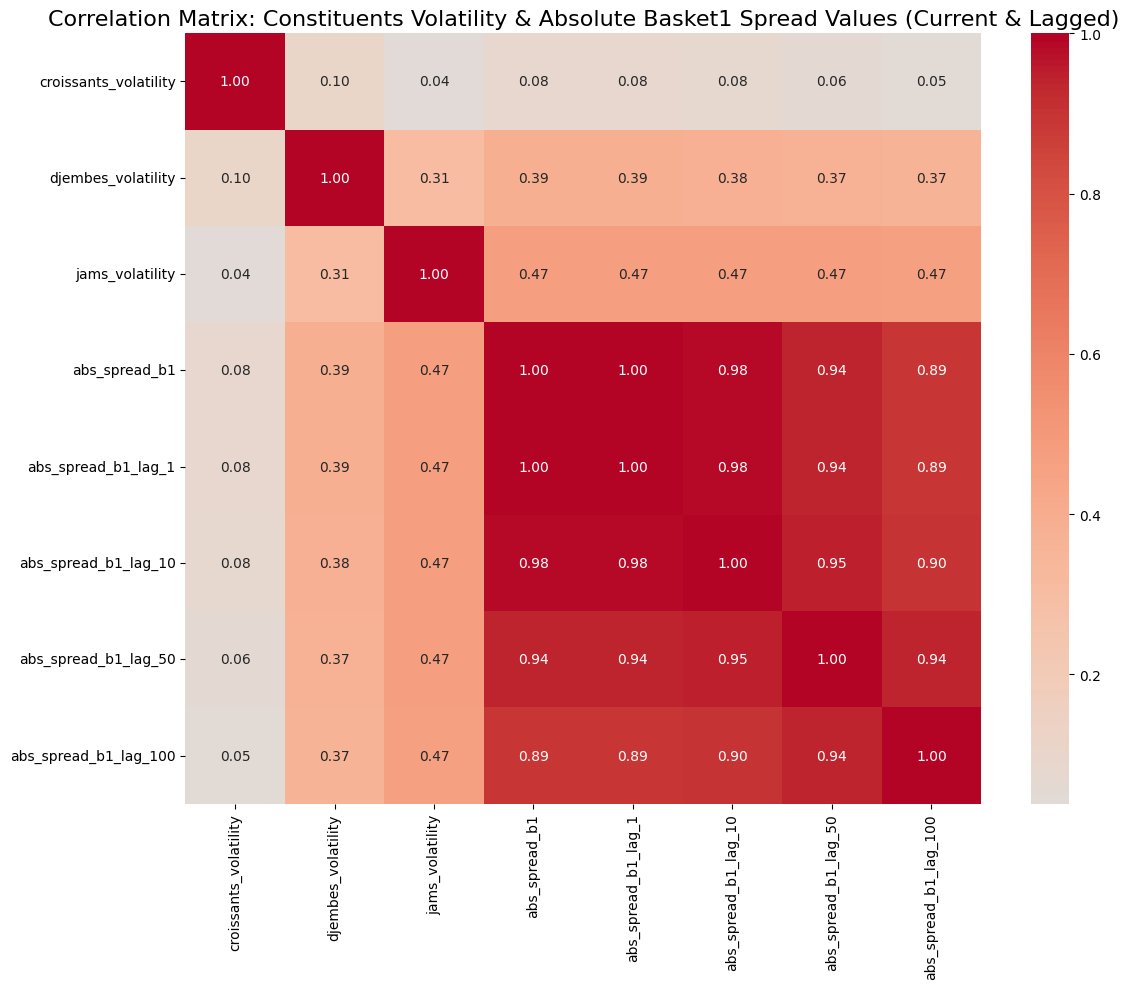

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- New Notebook Cell ---
# Define the lags at which we want to sample the absolute value of the spread
spread_lags = [1, 10, 50, 100]

# Create a new column for the absolute value of basket1 spread
df_all["abs_spread_b1"] = df_all["spread_b1"].abs()

# Create lagged versions of the absolute basket1 spread value
for lag in spread_lags:
    df_all[f"abs_spread_b1_lag_{lag}"] = df_all["abs_spread_b1"].shift(lag)

# Define the columns for our focused analysis:
# Constituents' volatilities and the absolute basket1 spread (current and lagged values)
focus_columns = [
    "croissants_volatility",
    "djembes_volatility",
    "jams_volatility",
    "abs_spread_b1"
] + [f"abs_spread_b1_lag_{lag}" for lag in spread_lags]

# Build a new DataFrame with only these columns and drop any missing values
df_focus = df_all[focus_columns].dropna()

# Compute the correlation matrix for these features
corr_matrix = df_focus.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Constituents Volatility & Absolute Basket1 Spread Values (Current & Lagged)", fontsize=16)
plt.tight_layout()
plt.show()


jams volatility seems to be quite a strong predcitor??? and the signal strength doesn't taper off like djembes and crosisant does. 

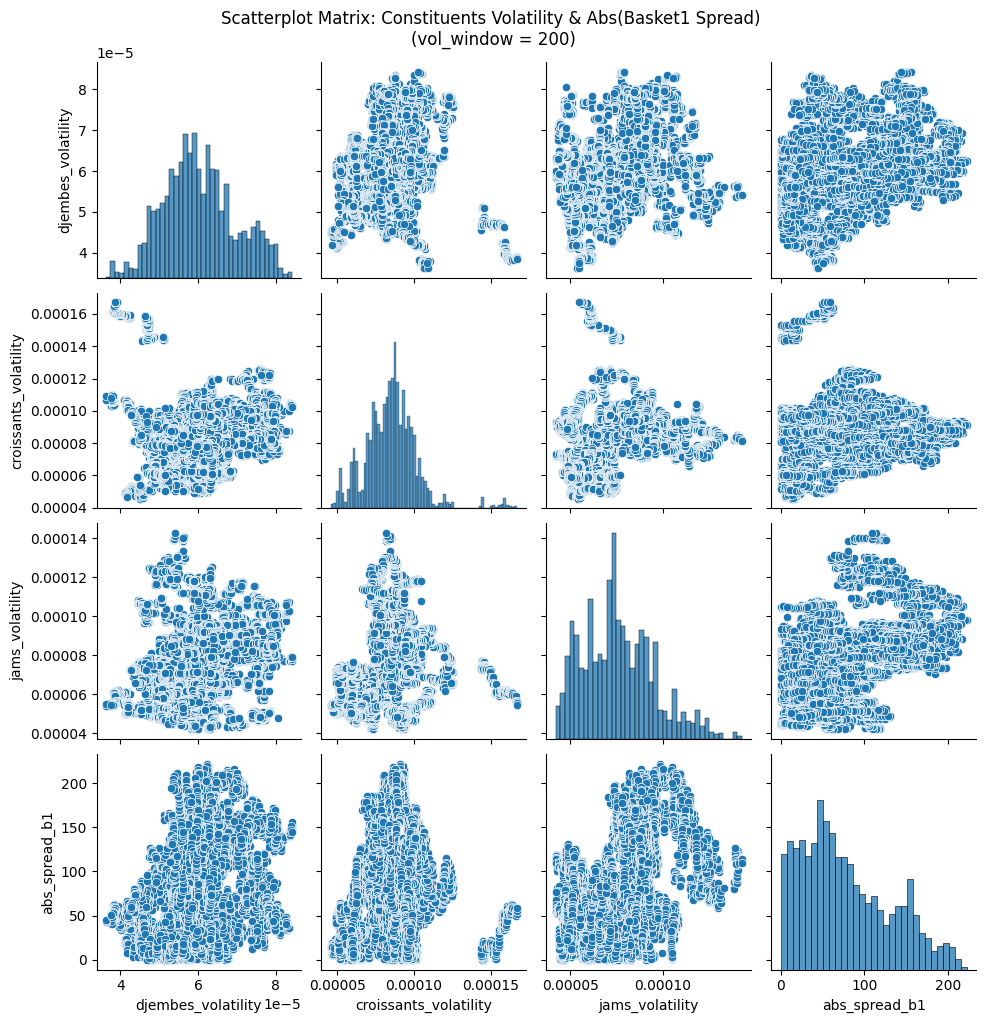

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- New Notebook Cell ---
# User-defined parameter for volatility window
new_vol_window = 200

# We need data for the three constituents plus the basket:
required_symbols = ["CROISSANTS", "DJEMBES", "JAMS", "PICNIC_BASKET1"]

# Filter market data for required symbols and only keep 'timestamp', 'product', and 'mid_price'
df_sub = market_data.copy()
df_sub = df_sub[df_sub["product"].isin(required_symbols)]
df_sub = df_sub[["timestamp", "product", "mid_price"]]

# Create an empty dictionary to store each product's recalculated DataFrame
result_dfs = {}

# For each symbol, calculate the log mid_price, base log return, and rolling volatility
for sym in required_symbols:
    df_sym = df_sub[df_sub["product"] == sym].copy().sort_values("timestamp")
    
    # Ensure mid_price is numeric and compute the log price
    df_sym["mid_price"] = pd.to_numeric(df_sym["mid_price"], errors="coerce")
    df_sym["log_mid_price"] = np.log(df_sym["mid_price"])
    
    # Compute the base log return (difference)
    df_sym["base_log_return"] = df_sym["log_mid_price"].diff()
    
    # Compute the rolling volatility using the new volatility window
    vol_col = f"{sym.lower()}_volatility"
    df_sym[vol_col] = df_sym["base_log_return"].rolling(window=new_vol_window).std()
    
    # Rename 'mid_price' to include the symbol name (lowercase) for merging
    df_sym.rename(columns={"mid_price": f"{sym.lower()}_mid_price"}, inplace=True)
    
    # Keep only the timestamp and the volatility (we need prices for basket calculation too)
    df_sym = df_sym[["timestamp", f"{sym.lower()}_mid_price", vol_col]]
    
    # Set timestamp as the index for merging purposes
    df_sym.set_index("timestamp", inplace=True)
    
    # Save to dictionary
    result_dfs[sym] = df_sym

# Merge the constituent and basket data on timestamp (inner join to keep only common timestamps)
merged_df = pd.concat([result_dfs[sym] for sym in required_symbols], axis=1, join="inner")

# Calculate the basket1 spread:
# PICNIC_BASKET1_mid_price - (6 * CROISSANTS_mid_price + 3 * JAMS_mid_price + 1 * DJEMBES_mid_price)
merged_df["spread_b1"] = merged_df["picnic_basket1_mid_price"] - (
    6 * merged_df["croissants_mid_price"] +
    3 * merged_df["jams_mid_price"] +
    1 * merged_df["djembes_mid_price"]
)

# Take the absolute value of the basket1 spread
merged_df["abs_spread_b1"] = merged_df["spread_b1"].abs()

# Create a new DataFrame for the scatterplot focusing on:
# DJEMBES volatility, CROISSANTS volatility, JAMS volatility, and abs(spread_b1)
scatter_df = merged_df[[
    "djembes_volatility",
    "croissants_volatility",
    "jams_volatility",
    "abs_spread_b1"
]].dropna()

# Plot the scatterplot matrix (pairplot)
sns.pairplot(scatter_df)
plt.suptitle(f"Scatterplot Matrix: Constituents Volatility & Abs(Basket1 Spread) \n(vol_window = {new_vol_window})", y=1.02)
plt.show()


Can we try a linear regression?  

Something like, spread ~ djembe vol + croissant vol + jam vol and interaction terms?

In [12]:
import statsmodels.api as sm

# Create a regression DataFrame focusing on our variables of interest
df_reg = merged_df[['croissants_volatility', 'djembes_volatility', 'jams_volatility', 'abs_spread_b1']].dropna()

# Define the independent variables (volatilities) and dependent variable (abs_spread_b1)
X = df_reg[['croissants_volatility', 'djembes_volatility', 'jams_volatility']]
y = df_reg['abs_spread_b1']

# Add a constant term to the independent variables to capture the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          abs_spread_b1   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1125.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:16:53   Log-Likelihood:                -51364.
No. Observations:                9800   AIC:                         1.027e+05
Df Residuals:                    9796   BIC:                         1.028e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -85.54

In [13]:
import statsmodels.api as sm

# Create a regression DataFrame focusing on our variables of interest
df_reg = merged_df[['croissants_volatility', 'djembes_volatility', 'jams_volatility', 'spread_b1']].dropna()

# Define the independent variables (volatilities) and dependent variable (abs_spread_b1)
X = df_reg[['croissants_volatility', 'djembes_volatility', 'jams_volatility']]
y = df_reg['spread_b1']

# Add a constant term to the independent variables to capture the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              spread_b1   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2125.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:16:53   Log-Likelihood:                -54572.
No. Observations:                9800   AIC:                         1.092e+05
Df Residuals:                    9796   BIC:                         1.092e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -270.37

When I do abs(spread) I get R^2 = 0.256, and it shows that croissants is not significant.  
When i do spread, I get R^2 = 0.394 and it shows that croissants is as significant as the other ones.  

⚠️ Warnings / Diagnostics
Condition Number: 1.13e+05 → Suggests potential multicollinearity (independent variables are correlated, which inflates standard errors and makes interpretation less reliable).

Durbin-Watson: 0.008 → Very low, implying strong autocorrelation in residuals (bad for regression assumptions).

Jarque-Bera and Omnibus Tests (p ≈ 0) → Residuals are not normally distributed (violates another OLS assumption).


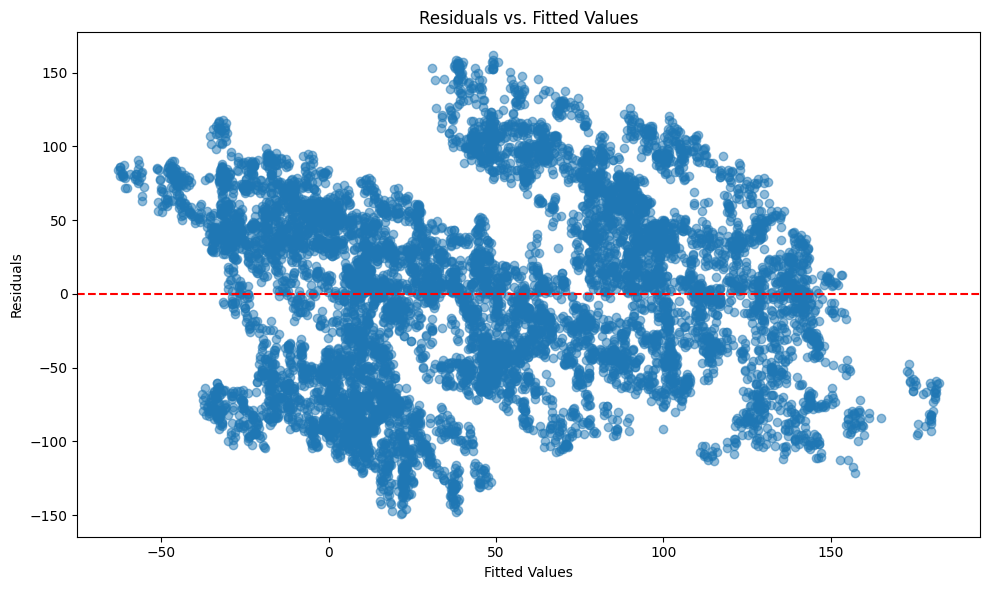

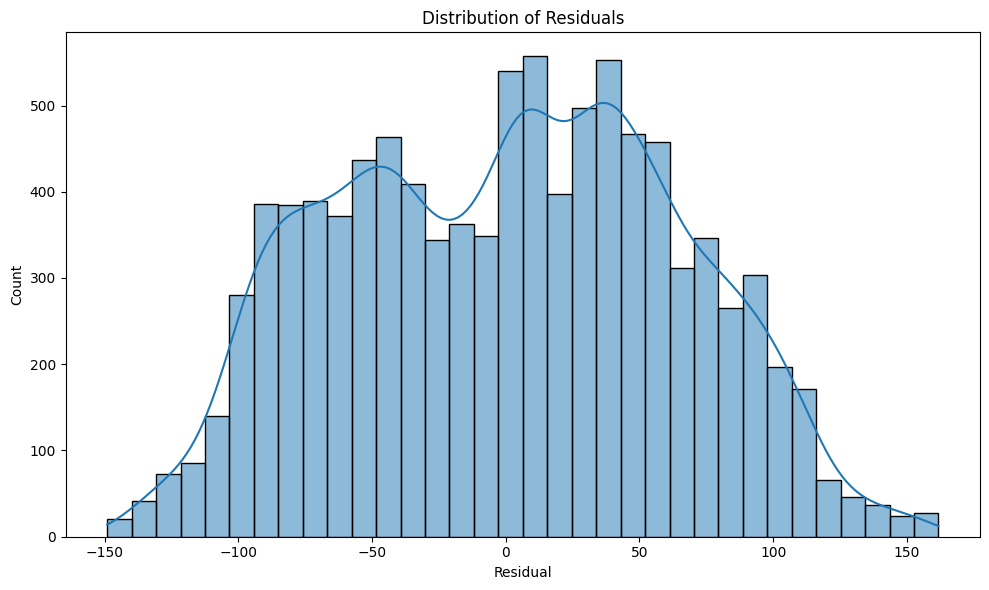

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your model is already fitted using statsmodels and stored in 'model'
# Get the fitted values and the residuals from the model
fitted_values = model.fittedvalues
residuals = model.resid

# Plot 1: Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.tight_layout()
plt.show()

# Plot 2: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()



interaction terms? idk

In [26]:
import itertools
import statsmodels.api as sm

# --- Compute the new candidate predictor: spread_b1 from one interval ago
df_reg["spread_b1_lag_30"] = df_reg["spread_b1"].shift(30)

# Drop any rows with NaN values (which may result from shifting)
df_reg = df_reg.dropna()

# Define the list of candidate predictor variable names (now including spread_b1_lag_1)
predictors = [
    "croissants_volatility",
    "djembes_volatility",
    "jams_volatility",
    "croissants_djembes",
    "croissants_jams",
    "djembes_jams",
    "croissants_croissants",
    "djembes_djembes",
    "jams_jams",
    "croissants_djembes_jams",
    "spread_b1_lag_30"
]

# Pairwise interactions
df_reg['croissants_djembes'] = df_reg['croissants_volatility'] * df_reg['djembes_volatility']
df_reg['croissants_jams'] = df_reg['croissants_volatility'] * df_reg['jams_volatility']
df_reg['djembes_jams'] = df_reg['djembes_volatility'] * df_reg['jams_volatility']

# Squared terms (self-interactions)
df_reg['croissants_croissants'] = df_reg['croissants_volatility'] ** 2
df_reg['djembes_djembes'] = df_reg['djembes_volatility'] ** 2
df_reg['jams_jams'] = df_reg['jams_volatility'] ** 2

# Three-way interaction
df_reg['croissants_djembes_jams'] = (df_reg['croissants_volatility'] *
                                     df_reg['djembes_volatility'] *
                                     df_reg['jams_volatility'])


# Define dependent variable: here we use 'spread_b1'
y = df_reg["spread_b1"]

# List to store results for each model
model_results = []

# Loop over all non-empty subsets of predictors (2^8 - 1 models now)
for i in range(1, len(predictors) + 1):
    for subset in itertools.combinations(predictors, i):
        # Create design matrix with this set of predictors, and add a constant for the intercept.
        X_subset = df_reg[list(subset)]
        X_subset = sm.add_constant(X_subset)
        # Fit the model
        model = sm.OLS(y, X_subset).fit()
        # Store the subset and model diagnostics (AIC and BIC)
        model_results.append({
            "predictors": subset,
            "aic": model.aic,
            "bic": model.bic,
            "model": model
        })

# Sort the models by AIC (alternatively by BIC if desired)
best_models = sorted(model_results, key=lambda x: x["aic"])[:5]

# Print the summary for the top 5 models
print("Top 5 Models by AIC:\n")
for i, res in enumerate(best_models, 1):
    preds = ", ".join(res["predictors"])
    print(f"Model {i}: Predictors: {preds}")
    print(f"   AIC: {res['aic']:.2f}, BIC: {res['bic']:.2f}")
    print(res["model"].summary())
    print("\n" + "="*80 + "\n")

    


Top 5 Models by AIC:

Model 1: Predictors: croissants_volatility, djembes_volatility, croissants_djembes, croissants_croissants, djembes_djembes, jams_jams, croissants_djembes_jams, spread_b1_lag_30
   AIC: 81540.47, BIC: 81597.95
                            OLS Regression Results                            
Dep. Variable:              spread_b1   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 3.526e+04
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:26:51   Log-Likelihood:                -40762.
No. Observations:                9750   AIC:                         8.154e+04
Df Residuals:                    9742   BIC:                         8.160e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                     

now try predict different things using these same predictors

In [16]:
import itertools
import statsmodels.api as sm

# --- Compute the new candidate predictor: spread_b1 from one interval ago (if needed)
# For example, you might have this commented-out, or add additional lagged features:
# df_reg["spread_b1_lag_30"] = df_reg["spread_b1"].shift(30)

# Before proceeding, drop rows with any NaN values that might have been introduced
df_reg = df_reg.dropna()

# === Compute your interaction and squared terms as before ===

# Pairwise interactions
df_reg['croissants_djembes'] = df_reg['croissants_volatility'] * df_reg['djembes_volatility']
df_reg['croissants_jams'] = df_reg['croissants_volatility'] * df_reg['jams_volatility']
df_reg['djembes_jams'] = df_reg['djembes_volatility'] * df_reg['jams_volatility']

# Squared terms (self-interactions)
df_reg['croissants_croissants'] = df_reg['croissants_volatility'] ** 2
df_reg['djembes_djembes'] = df_reg['djembes_volatility'] ** 2
df_reg['jams_jams'] = df_reg['jams_volatility'] ** 2

# Three-way interaction
df_reg['croissants_djembes_jams'] = (df_reg['croissants_volatility'] *
                                     df_reg['djembes_volatility'] *
                                     df_reg['jams_volatility'])

# === Modify the dependent variable to predict 20 steps ahead ===
# Create a new column "future_spread_b1" that is spread_b1 shifted by -20 (i.e. 20 steps into the future)
df_reg["future_spread_b1"] = df_reg["spread_b1"].shift(-20)

# Drop rows where future_spread_b1 is NaN (these come from the shift)
df_reg = df_reg.dropna(subset=["future_spread_b1"])

# Set the new dependent variable
y = df_reg["future_spread_b1"]

# Define the list of candidate predictor variable names (now including spread_b1_lag_1, if desired)
predictors = [
    "croissants_volatility",
    "djembes_volatility",
    "jams_volatility",
    "croissants_djembes",
    "croissants_jams",
    "djembes_jams",
    "croissants_croissants",
    "djembes_djembes",
    "jams_jams",
    "croissants_djembes_jams"
    # "spread_b1_lag_30"  # If you want to include additional lagged features, uncomment this.
]

# List to store results for each model
model_results = []

# Loop over all non-empty subsets of predictors (2^(number of predictors) - 1 models)
for i in range(1, len(predictors) + 1):
    for subset in itertools.combinations(predictors, i):
        # Create design matrix with this set of predictors
        X_subset = df_reg[list(subset)]
        # Add a constant for the intercept (must match model training)
        X_subset = sm.add_constant(X_subset)
        # Fit the model predicting future_spread_b1
        model = sm.OLS(y, X_subset).fit()
        # Store the subset and diagnostics (AIC and BIC)
        model_results.append({
            "predictors": subset,
            "aic": model.aic,
            "bic": model.bic,
            "model": model
        })

# Sort the models by AIC (or BIC if you prefer)
best_models = sorted(model_results, key=lambda x: x["aic"])[:5]

# Print the summary for the top 5 models
print("Top 5 Models by AIC (predicting future spread 20 steps ahead):\n")
for i, res in enumerate(best_models, 1):
    preds = ", ".join(res["predictors"])
    print(f"Model {i}: Predictors: {preds}")
    print(f"   AIC: {res['aic']:.2f}, BIC: {res['bic']:.2f}")
    print(res["model"].summary())
    print("\n" + "="*80 + "\n")


Top 5 Models by AIC (predicting future spread 20 steps ahead):

Model 1: Predictors: croissants_volatility, djembes_volatility, croissants_djembes, djembes_jams, croissants_croissants, djembes_djembes, jams_jams, croissants_djembes_jams
   AIC: 108037.92, BIC: 108102.61
                            OLS Regression Results                            
Dep. Variable:       future_spread_b1   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     977.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:17:05   Log-Likelihood:                -54010.
No. Observations:                9780   AIC:                         1.080e+05
Df Residuals:                    9771   BIC:                         1.081e+05
Df Model:                           8                                         
Covariance Type:  

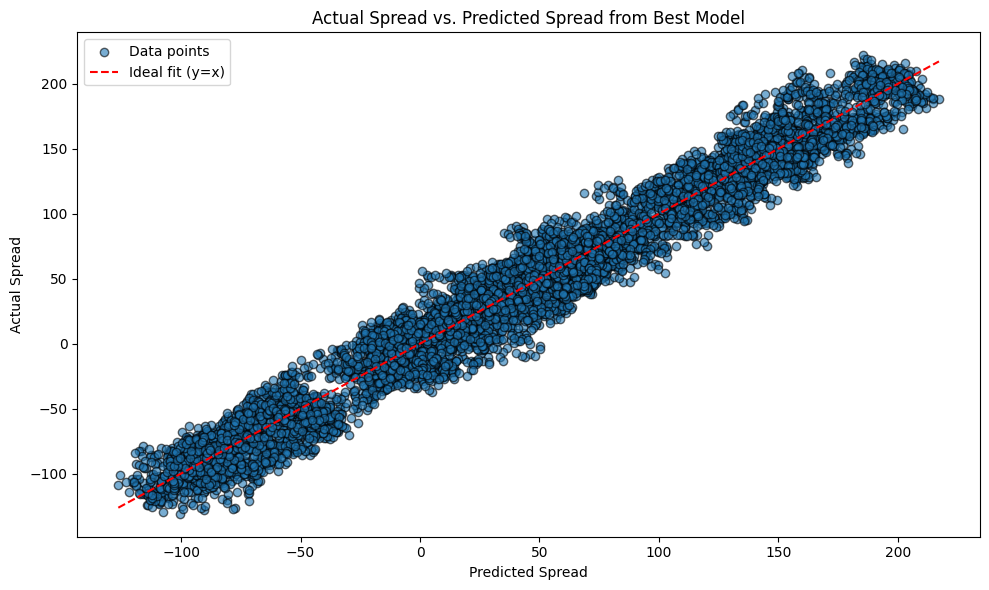

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve the best model (first element in best_models list)
best_model = best_models[0]["model"]

# Get the fitted (predicted) values and the actual values
predicted = best_model.fittedvalues
actual = best_model.model.endog  # same as df_reg['spread_b1'] subset used in that model

# Plot a scatter plot of the predicted vs. actual spread
plt.figure(figsize=(10, 6))
plt.scatter(predicted, actual, alpha=0.6, edgecolor='k', label="Data points")
# Plot a 45-degree line to serve as a reference
min_val, max_val = np.min(predicted), np.max(predicted)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal fit (y=x)")
plt.xlabel("Predicted Spread")
plt.ylabel("Actual Spread")
plt.title("Actual Spread vs. Predicted Spread from Best Model")
plt.legend()
plt.tight_layout()
plt.show()




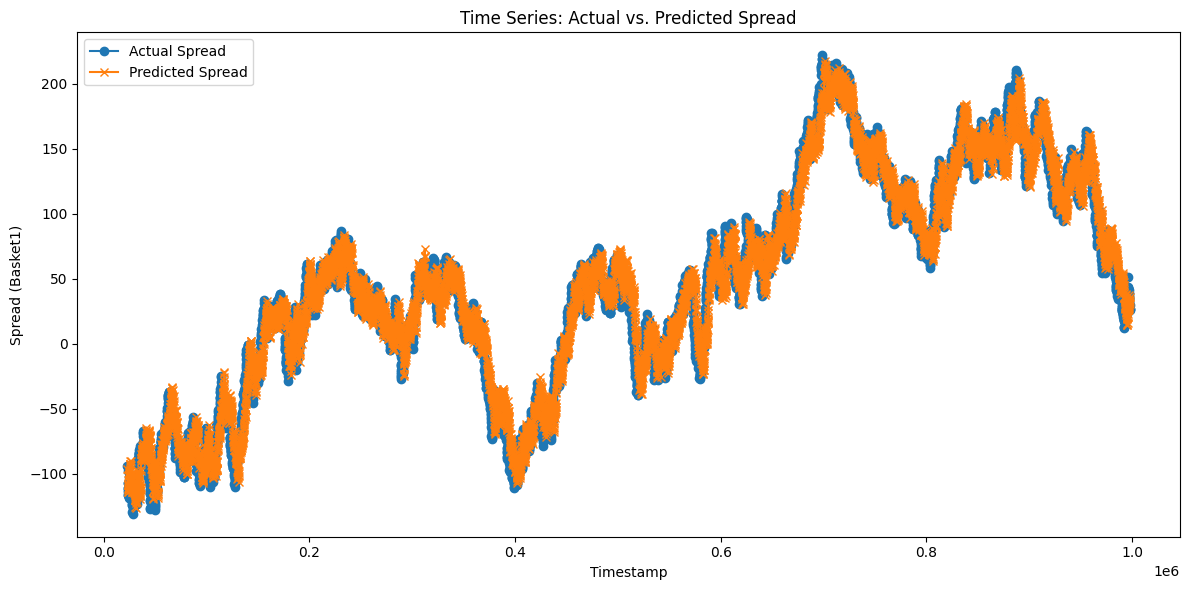

In [28]:
import statsmodels.api as sm

# The best model from your previous code
best_model = best_models[0]["model"]

# Suppose df_reg is the DataFrame you originally used to fit your model, which has 'spread_b1'
# and the necessary predictors, plus a 'timestamp' column (or an index you can reset).
df_reg_reset = df_reg.reset_index(drop=False)  # If 'timestamp' was your index, rename it here
# e.g., df_reg_reset.rename(columns={"index": "timestamp"}, inplace=True)

# Here are the predictors from that best model:
predictor_cols = list(best_models[0]["predictors"])  # e.g. ["djembes_volatility", "jams_volatility", "croissants_djembes", ...]

# Create a design matrix X_test with those predictors
X_test = df_reg_reset[predictor_cols]

# Add a constant column
X_test = sm.add_constant(X_test, has_constant="add")

# Generate predictions
df_reg_reset["predicted_spread"] = best_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual spread
plt.plot(df_reg_reset["timestamp"], df_reg_reset["spread_b1"], label="Actual Spread", marker="o")

# Plot the predicted spread
plt.plot(df_reg_reset["timestamp"], df_reg_reset["predicted_spread"], label="Predicted Spread", marker="x")

plt.xlabel("Timestamp")
plt.ylabel("Spread (Basket1)")
plt.title("Time Series: Actual vs. Predicted Spread")
plt.legend()
plt.tight_layout()
plt.show()


I think the issue with predicting spread 

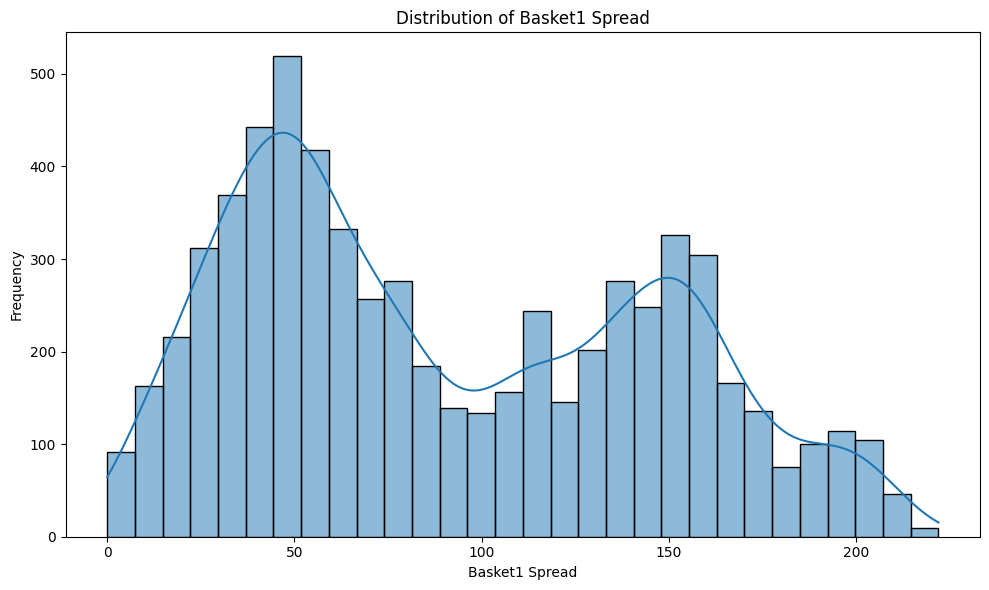

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_all has been computed and contains the 'spread_b1' column.
plt.figure(figsize=(10, 6))
sns.histplot(df_all["spread_b1"], bins=30, kde=True)
plt.title("Distribution of Basket1 Spread")
plt.xlabel("Basket1 Spread")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


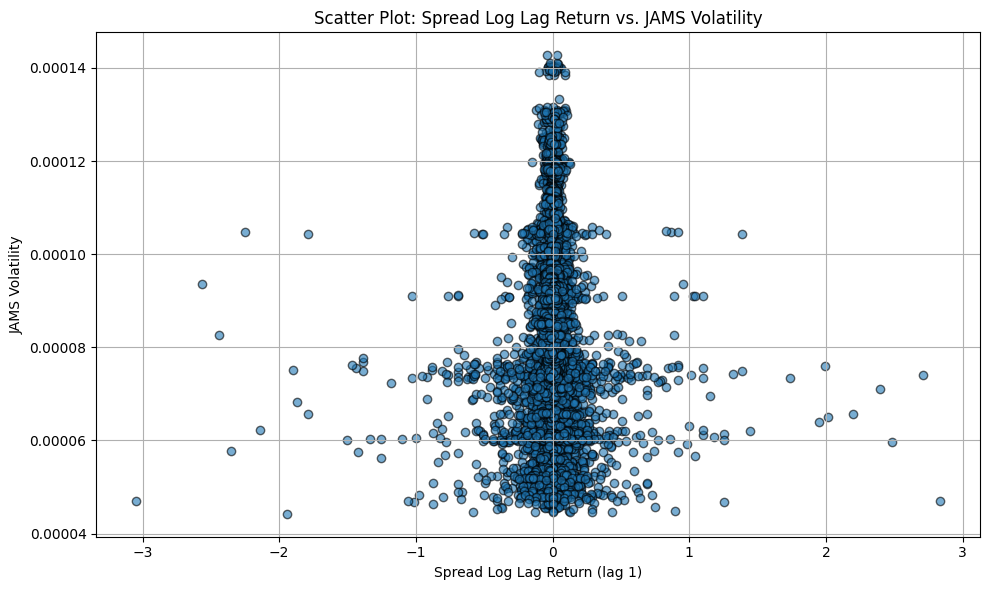

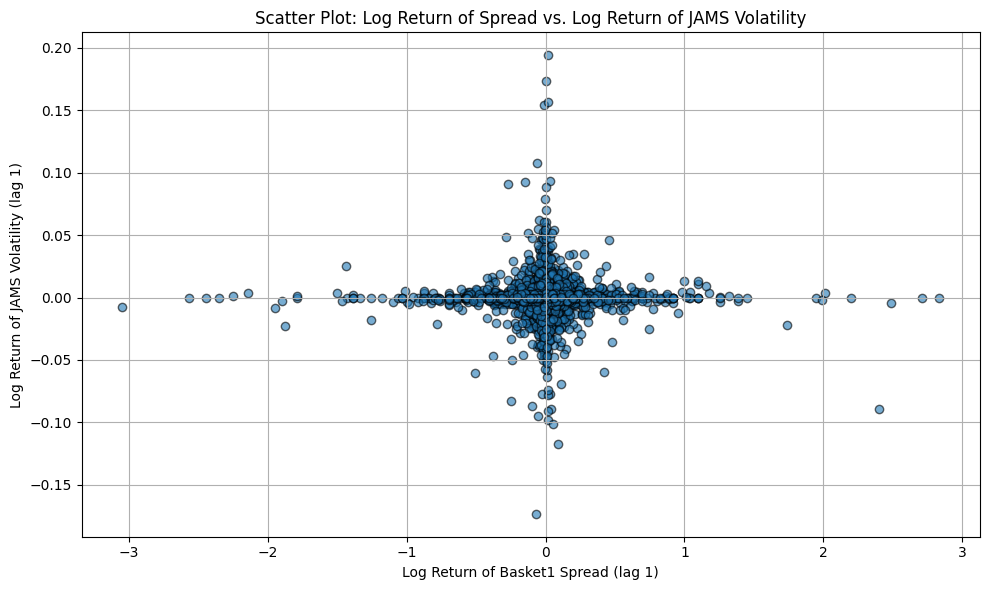

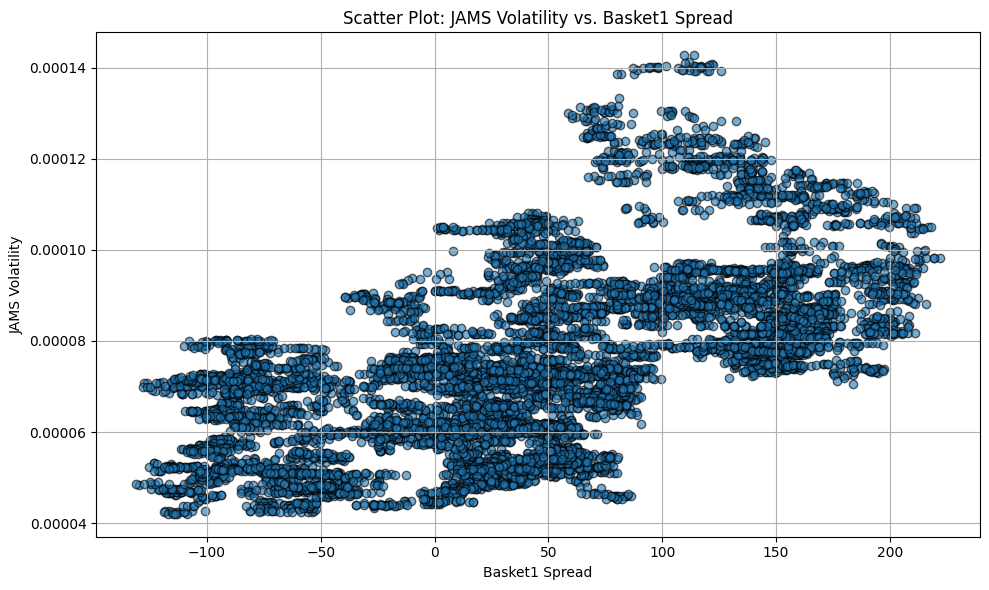

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the one-period lag log return for spread_b1
spread_b1 = merged_df['spread_b1']
lag_return = np.log(spread_b1) - np.log(spread_b1.shift(1))

# Remove NaN and infinite values from lag returns
clean_returns = lag_return.replace([np.inf, -np.inf], np.nan).dropna()

# Extract JAMS volatility for the same timestamps as clean_returns.
# We assume merged_df contains a column 'jams_volatility'
jams_vol = merged_df['jams_volatility'].loc[clean_returns.index].dropna()

# Align the two series to have the same timestamps (common index)
common_index = clean_returns.index.intersection(jams_vol.index)
clean_returns = clean_returns.loc[common_index]
jams_vol = jams_vol.loc[common_index]

# Create a scatter plot: lag return (x-axis) vs. JAMS volatility (y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(clean_returns, jams_vol, alpha=0.6, edgecolor='k')
plt.title("Scatter Plot: Spread Log Lag Return vs. JAMS Volatility")
plt.xlabel("Spread Log Lag Return (lag 1)")
plt.ylabel("JAMS Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Compute the one-period log return of the basket1 spread
spread_log_return = np.log(merged_df['spread_b1']) - np.log(merged_df['spread_b1'].shift(1))

# Compute the one-period log return of JAMS volatility
jams_vol_log_return = np.log(merged_df['jams_volatility']) - np.log(merged_df['jams_volatility'].shift(1))

# Remove NaN and infinite values from both series
spread_log_return_clean = spread_log_return.replace([np.inf, -np.inf], np.nan).dropna()
jams_vol_log_return_clean = jams_vol_log_return.replace([np.inf, -np.inf], np.nan).dropna()

# Align the indices for both series (take their intersection)
common_index = spread_log_return_clean.index.intersection(jams_vol_log_return_clean.index)
spread_log_return_aligned = spread_log_return_clean.loc[common_index]
jams_vol_log_return_aligned = jams_vol_log_return_clean.loc[common_index]

# Plot the scatterplot comparing the log return of the spread vs. the log return of JAMS volatility
plt.figure(figsize=(10, 6))
plt.scatter(spread_log_return_aligned, jams_vol_log_return_aligned, alpha=0.6, edgecolor='k')
plt.xlabel("Log Return of Basket1 Spread (lag 1)")
plt.ylabel("Log Return of JAMS Volatility (lag 1)")
plt.title("Scatter Plot: Log Return of Spread vs. Log Return of JAMS Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Extract the basket1 spread and JAMS volatility from merged_df
spread = merged_df['spread_b1']
jams_vol = merged_df['jams_volatility']

# Align the two series by taking the intersection of their indices
common_index = spread.index.intersection(jams_vol.index)
spread_aligned = spread.loc[common_index]
jams_vol_aligned = jams_vol.loc[common_index]

# Optionally, remove any NaN or infinite values
spread_aligned = spread_aligned.replace([np.inf, -np.inf], np.nan).dropna()
jams_vol_aligned = jams_vol_aligned.replace([np.inf, -np.inf], np.nan).dropna()

# Re-align indices after cleaning
common_index = spread_aligned.index.intersection(jams_vol_aligned.index)
spread_aligned = spread_aligned.loc[common_index]
jams_vol_aligned = jams_vol_aligned.loc[common_index]

# Create the scatter plot: x-axis is basket1 spread, y-axis is JAMS volatility
plt.figure(figsize=(10, 6))
plt.scatter(spread_aligned, jams_vol_aligned, alpha=0.6, edgecolor='k')
plt.xlabel("Basket1 Spread")
plt.ylabel("JAMS Volatility")
plt.title("Scatter Plot: JAMS Volatility vs. Basket1 Spread")
plt.grid(True)
plt.tight_layout()
plt.show()


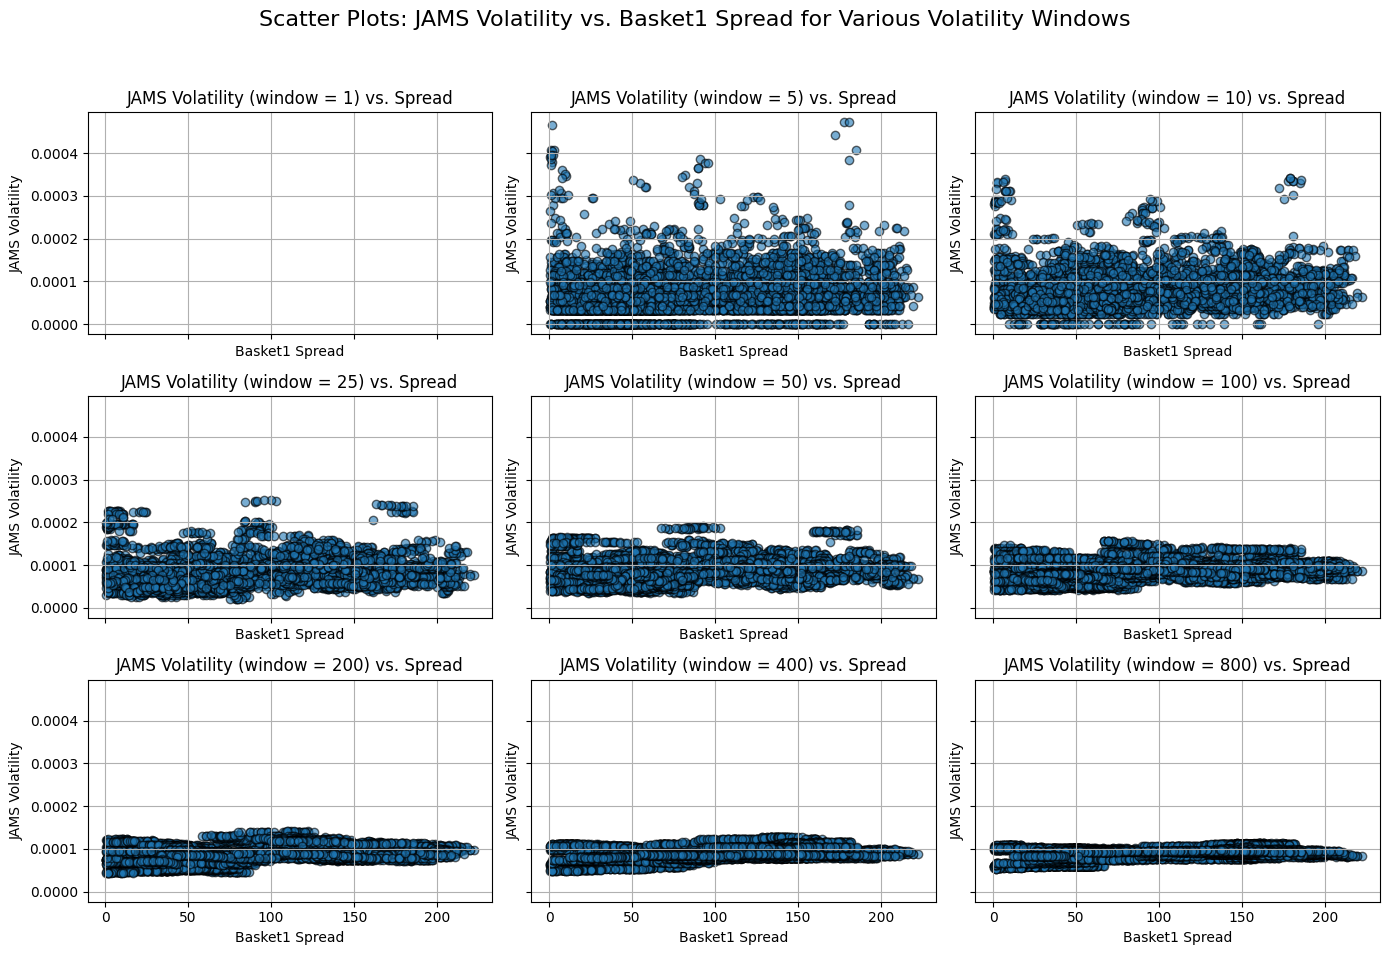

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# List of volatility windows to explore
vol_windows = [1,5,10,25,50,100,200,400,800]

# Create subplots (2 rows x 2 columns if 4 windows)
fig, axs = plt.subplots(3,3, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

df_with_only_positive_b1_spread = merged_df[merged_df['spread_b1'] > 0]

# Compute the JAMS log price once (assuming 'jams_mid_price' exists in merged_df)
jams_log_price = np.log(df_with_only_positive_b1_spread['jams_mid_price'])

# Compute the base log return for JAMS (difference of the log prices)
jams_log_return = jams_log_price.diff()

# Loop over each volatility window and plot the scatter of recalculated JAMS volatility vs. spread_b1
for i, window in enumerate(vol_windows):
    # Compute rolling volatility on JAMS log returns for the current window
    jams_vol_window = jams_log_return.rolling(window=window).std()
    
    # Align the computed volatility with the basket1 spread
    # Take the common indices between the computed volatility and spread_b1 series
    common_idx = jams_vol_window.dropna().index.intersection(df_with_only_positive_b1_spread['spread_b1'].dropna().index)
    jams_vol_aligned = jams_vol_window.loc[common_idx]
    spread_aligned = df_with_only_positive_b1_spread['spread_b1'].loc[common_idx]
    
    # Create a scatter plot for this window
    axs[i].scatter(spread_aligned, jams_vol_aligned, alpha=0.6, edgecolor='k')
    axs[i].set_title(f"JAMS Volatility (window = {window}) vs. Spread")
    axs[i].set_xlabel("Basket1 Spread")
    axs[i].set_ylabel("JAMS Volatility")
    axs[i].grid(True)

plt.suptitle("Scatter Plots: JAMS Volatility vs. Basket1 Spread for Various Volatility Windows", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


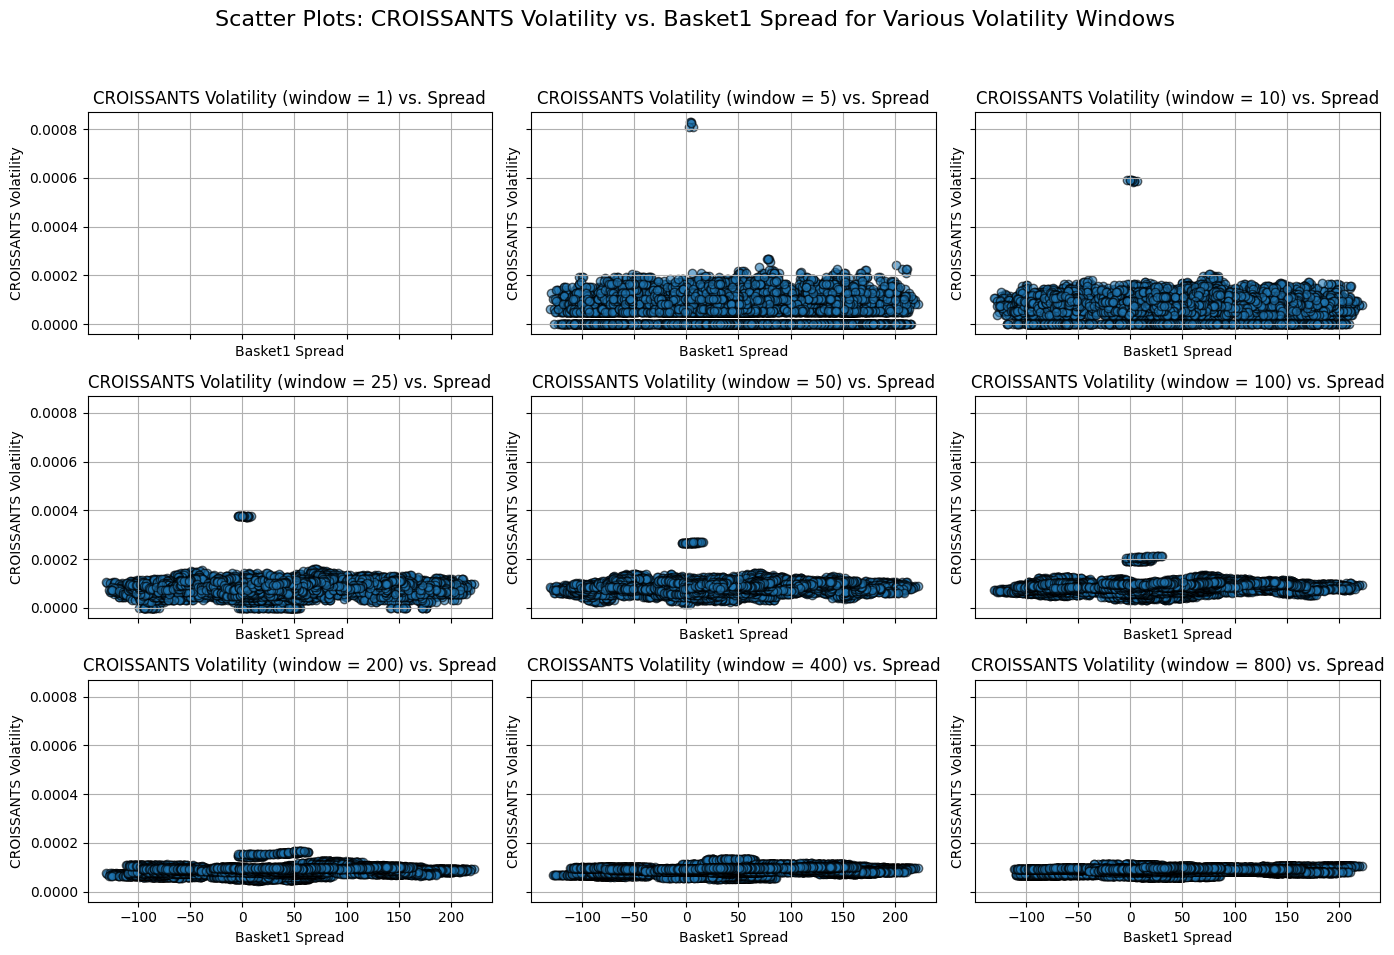

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# List of volatility windows to explore
vol_windows = [1,5,10,25,50,100,200,400,800]

# Create subplots (2 rows x 2 columns if 4 windows)
fig, axs = plt.subplots(3,3, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

# Compute the CROISSANTS log price once (assuming 'croissants_mid_price' exists in merged_df)
croissants_log_price = np.log(merged_df['croissants_mid_price'])

# Compute the base log return for CROISSANTS (difference of the log prices)
croissants_log_return = croissants_log_price.diff()

# Loop over each volatility window and plot the scatter of recalculated CROISSANTS volatility vs. spread_b1
for i, window in enumerate(vol_windows):
    # Compute rolling volatility on CROISSANTS log returns for the current window
    croissants_vol_window = croissants_log_return.rolling(window=window).std()
    
    # Align the computed volatility with the basket1 spread
    # Take the common indices between the computed volatility and spread_b1 series
    common_idx = croissants_vol_window.dropna().index.intersection(merged_df['spread_b1'].dropna().index)
    croissants_vol_aligned = croissants_vol_window.loc[common_idx]
    spread_aligned = merged_df['spread_b1'].loc[common_idx]
    
    # Create a scatter plot for this window
    axs[i].scatter(spread_aligned, croissants_vol_aligned, alpha=0.6, edgecolor='k')
    axs[i].set_title(f"CROISSANTS Volatility (window = {window}) vs. Spread")
    axs[i].set_xlabel("Basket1 Spread")
    axs[i].set_ylabel("CROISSANTS Volatility")
    axs[i].grid(True)

plt.suptitle("Scatter Plots: CROISSANTS Volatility vs. Basket1 Spread for Various Volatility Windows", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


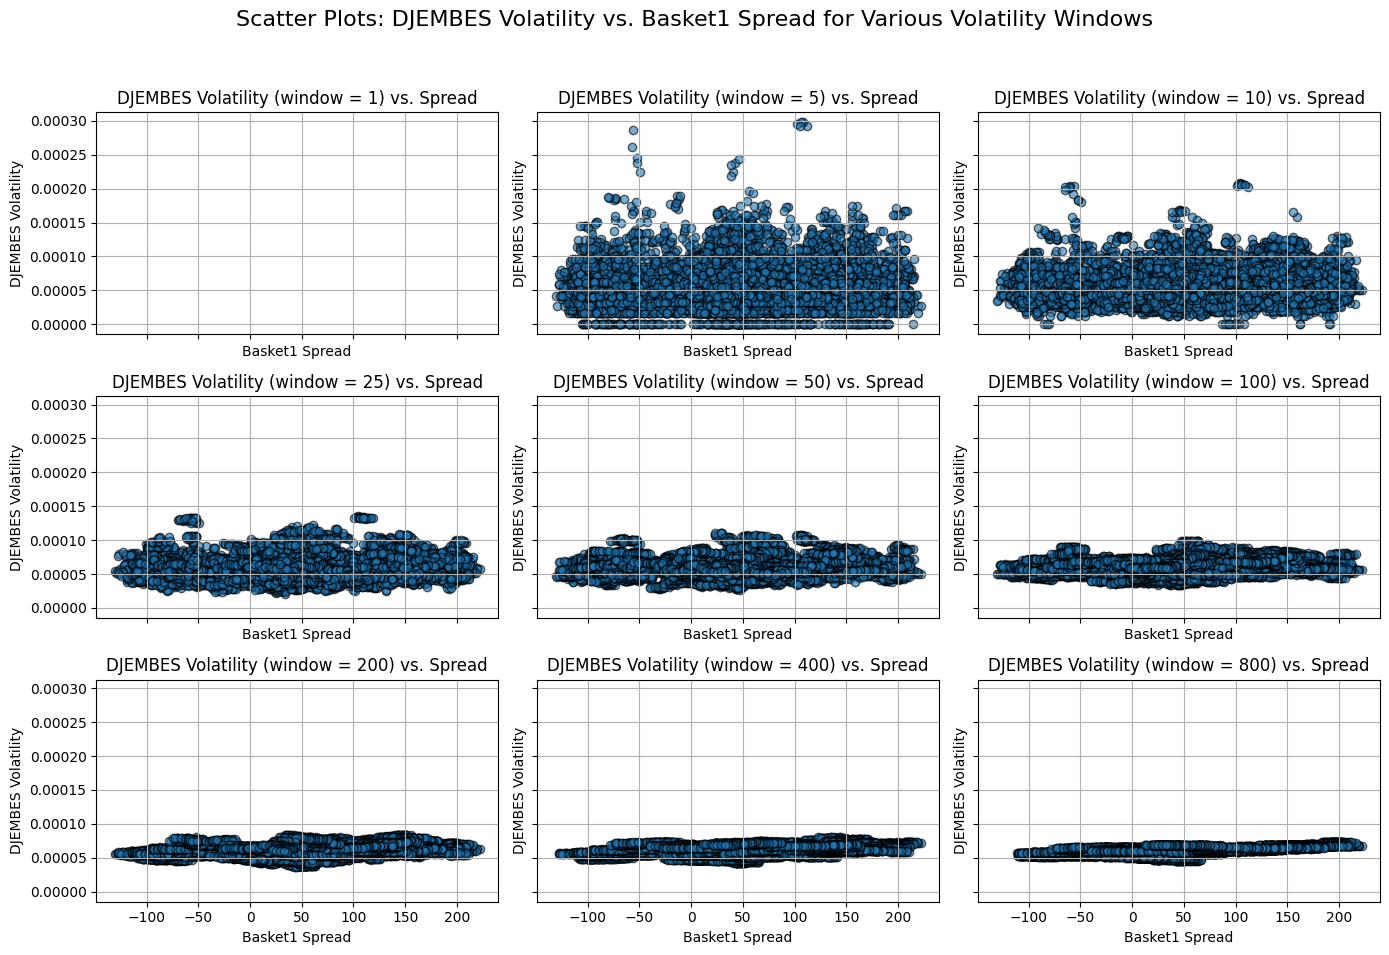

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# List of volatility windows to explore
vol_windows = [1,5,10,25,50,100,200,400,800]

# Create subplots (2 rows x 2 columns if 4 windows)
fig, axs = plt.subplots(3,3, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

# Compute the DJEMBES log price once (assuming 'djembes_mid_price' exists in merged_df)
djembes_log_price = np.log(merged_df['djembes_mid_price'])

# Compute the base log return for DJEMBES (difference of the log prices)
djembes_log_return = djembes_log_price.diff()

# Loop over each volatility window and plot the scatter of recalculated DJEMBES volatility vs. spread_b1
for i, window in enumerate(vol_windows):
    # Compute rolling volatility on DJEMBES log returns for the current window
    djembes_vol_window = djembes_log_return.rolling(window=window).std()
    
    # Align the computed volatility with the basket1 spread
    # Take the common indices between the computed volatility and spread_b1 series
    common_idx = djembes_vol_window.dropna().index.intersection(merged_df['spread_b1'].dropna().index)
    djembes_vol_aligned = djembes_vol_window.loc[common_idx]
    spread_aligned = merged_df['spread_b1'].loc[common_idx]
    
    # Create a scatter plot for this window
    axs[i].scatter(spread_aligned, djembes_vol_aligned, alpha=0.6, edgecolor='k')
    axs[i].set_title(f"DJEMBES Volatility (window = {window}) vs. Spread")
    axs[i].set_xlabel("Basket1 Spread")
    axs[i].set_ylabel("DJEMBES Volatility")
    axs[i].grid(True)

plt.suptitle("Scatter Plots: DJEMBES Volatility vs. Basket1 Spread for Various Volatility Windows", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


vector autorgression?

C:\Users\raoj6\AppData\Local\Microsoft\WindowsApps\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Lag Order Selection:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -59.14      -59.13   2.074e-26      -59.14
1       -79.96      -79.94   1.871e-35      -79.96
2       -80.00     -79.96*   1.810e-35     -79.98*
3       -80.00      -79.94   1.813e-35      -79.98
4       -80.00      -79.93   1.810e-35      -79.97
5       -80.00      -79.91   1.811e-35      -79.97
6       -79.99      -79.89   1.816e-35      -79.96
7       -80.00      -79.87   1.814e-35      -79.95
8       -79.99      -79.85   1.820e-35      -79.94
9      -80.00*      -79.85  1.797e-35*      -79.95
10      -80.00      -79.83   1.802e-35      -79.94
11      -80.00      -79.81   1.807e-35      -79.93
12      -80.00      -79.79   1.810e-35      -79.93
13      -80.00      -79.77   1.813e-35      -79.92
14      -79.99      -79.75   1.818e-35      -79.91
15      -79.99      -79.74   1.823e-35      -79.90
16      -

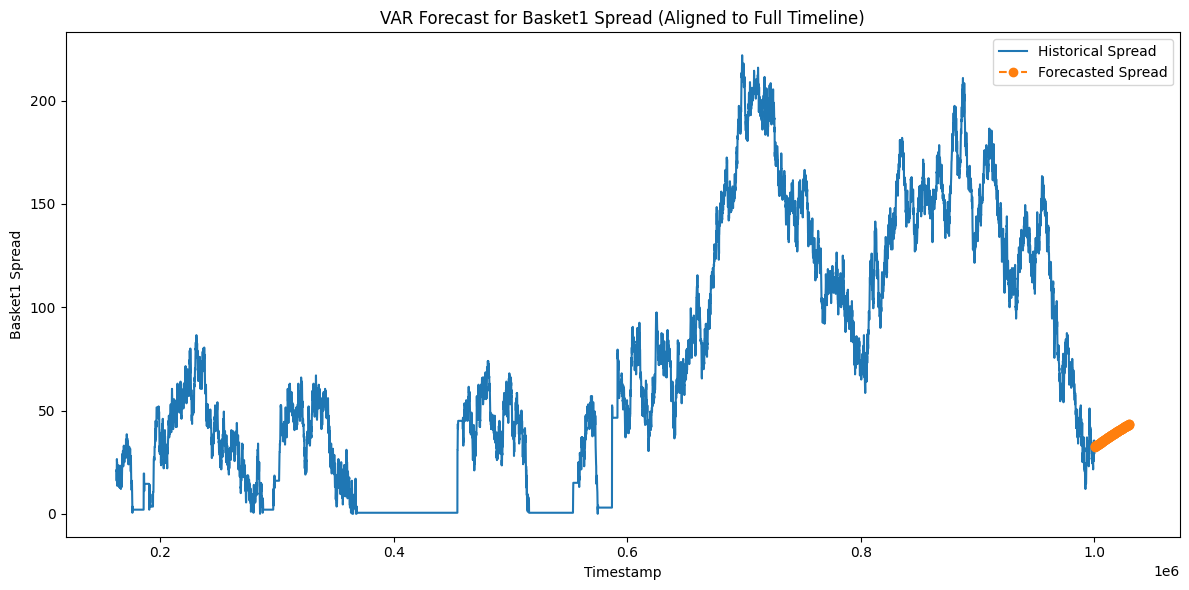

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# --- Prepare the Data ---
var_columns = ["spread_b1", "croissants_volatility", "djembes_volatility", "jams_volatility"]
var_data = df_all[var_columns].dropna()

# If your DataFrame does not have a numeric index but has a "timestamp" column,
# make sure to set its index accordingly. For example:
if 'timestamp' in df_all.columns:
    # Here, we set the index of var_data to the corresponding timestamps from df_all.
    # (Note: After dropna, not all timestamps are present.)
    var_data.index = df_all.loc[var_data.index, "timestamp"]

# --- Fit the VAR Model (your existing code) ---
model = VAR(var_data)
order_results = model.select_order(maxlags=20)
print("Lag Order Selection:\n", order_results.summary())

optimal_lag = order_results.selected_orders['aic']
print("Optimal Lag order by AIC:", optimal_lag)

var_results = model.fit(optimal_lag)
print(var_results.summary())

steps = 100 
forecast_values = var_results.forecast(var_data.values[-optimal_lag:], steps=steps)

# Construct the forecast index using the numeric timestamps:
timestamps = var_data.index.values
step_size = timestamps[1] - timestamps[0]
forecast_index = np.arange(timestamps[-1] + step_size, timestamps[-1] + step_size * (steps + 1), step_size)
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=var_columns)

# --- Align Historical Data with Full Timeline ---
# Get the full set of timestamps from market_data (which goes from 0 ... 1e6 in increments of 100).
full_timestamps = np.unique(market_data['timestamp'])
# Reindex the historical var_data to cover these full_timestamps, forward-filling missing values.
# (You can choose 'ffill' or another method as appropriate.)
var_data_aligned = var_data.reindex(full_timestamps, method='ffill')

# --- Plot the Forecast for the Basket1 Spread (Aligned) ---
plt.figure(figsize=(12, 6))
plt.plot(full_timestamps, var_data_aligned["spread_b1"], label="Historical Spread")
plt.plot(forecast_df.index, forecast_df["spread_b1"], label="Forecasted Spread", linestyle="--", marker="o")
plt.xlabel("Timestamp")
plt.ylabel("Basket1 Spread")
plt.title("VAR Forecast for Basket1 Spread (Aligned to Full Timeline)")
plt.legend()
plt.tight_layout()
plt.show()
